## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [1]:
# Use this cell to begin your analysis, and add as many as you would like!

#import pandas and matplotlib 

import pandas as pd
import matplotlib.pyplot as plt


In [20]:
#read csv to a dataframe
df_office = pd.read_csv("datasets/office_episodes.csv")

#create a subset to keep only important factor 
df_office_subset = df_office.loc[:, ["episode_number", "viewership_mil", "guest_stars", "has_guests", "scaled_ratings"]]

#subset the dataframe for only has guests
df_office_has_guests = df_office_subset[df_office_subset.loc[:,"has_guests"]]

df_office_10 = df_office_has_guests.head(10)
print(df_office_10)


29


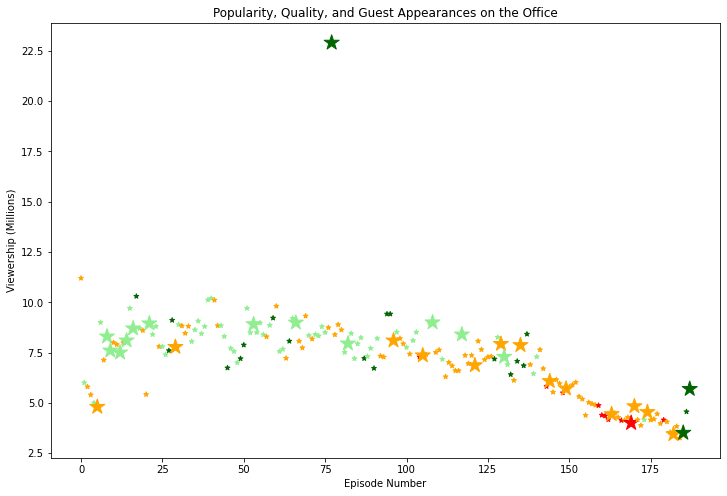

In [42]:
#Scatter plot exercise 1
#Define the scatter plot figure size
fig = plt.figure(figsize=(12,8))

#Define the color scheme reflacting the scaled rating
colors =[]
for index, row in df_office_subset.iterrows():
    if row["scaled_ratings"] < 0.25:
        colors.append("red")
    elif row["scaled_ratings"] >= 0.25 and row["scaled_ratings"] < 0.5:
        colors.append("orange")
    elif row["scaled_ratings"] >= 0.5 and row["scaled_ratings"] < 0.75:
        colors.append("lightgreen")
    else:
        colors.append("darkgreen")


#Episode with guest appearance have a marker size of 250 and episodes without are sized 25
for index, row in df_office_subset.iterrows() :
    if row["has_guests"]:
        df_office_subset.loc[index, "size"] = 250
    else:
        df_office_subset.loc[index, "size"] = 25
        
    

plt.scatter(df_office_subset['episode_number'], df_office_subset['viewership_mil'], c = colors, marker = "*", s = df_office_subset['size'])

plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.title("Popularity, Quality, and Guest Appearances on the Office")


plt.show()

In [101]:
#Name of one of the guest stars who was in the most watched office episode

df = df_office_has_guests.loc[df_office_has_guests['viewership_mil']==df_office_has_guests['viewership_mil'].max()]
most_viewed_guest_stars = df[['guest_stars']]
top = most_viewed_guest_stars.guest_stars.str.split(", ").tolist()[0]
top_star = top[2]
print(top_star)
#df_office_has_guests.sort_values(by ='viewership_mil', ascending = False))



Jessica Alba
